<a href="https://colab.research.google.com/github/kserdem/Python-ile-Veri-Analitigi-Egitimi_2/blob/main/Python_ile_Veri_Analiti%C4%9Fi_E%C4%9Fitimi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python ile Veri Analitiği Eğitimi 2

* Makine Öğrenmesi Yöntemleri
    * Denetimli Makine Öğrenmesi
    * Denetimsiz Makine Öğrenmesi 

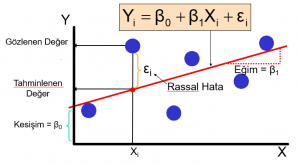

## [Sınıflandırma Problemleri Metrikleri](https://medium.com/machine-learning-t%C3%BCrkiye/eyvah-veri%CC%87-seti%CC%87m-i%CC%87mbalance-4bbb19f659a)

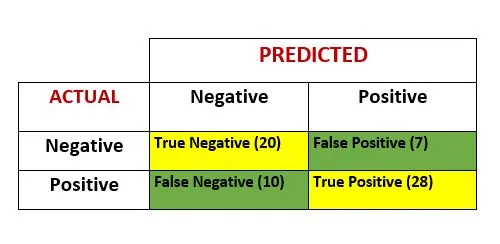

Bu kavramlar biraz karışık olduğu için depresyon hastası teşhisi üzerinden gidelim.



> True Negative : Gerçekte depresyon hastası olmayıp depresyonda değil olarak tahmin edilmesi.


> False Positive : Gerçekte depresyon hastası olmayıp depresyonda olarak tahmin edilmesi.

> False Negative : Gerçekte depresyon hastası olan birinin depresyonda değil olarak tahmin edilmesi.

> True Positive : Gerçekte depresyon hastalığına sahip olan birinin depresyon hastası olarak tahmin edilmesi.


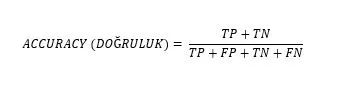
Doğru sınıflandırılan örneklerin yüzdesini veren metriktir.
İmbalance verilerde gözlemlerin çoğunluğunu bir sınıf oluşturduğu için bu metrik üzerinden yorumda bulunmak doğru olmaz.

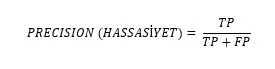

False positive olarak yapılan tahminlerin maliyetinin ölçüsü.

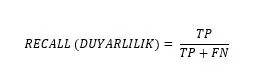

False negative olarak yapılan tahminlerin maliyetinin ölçüsü.
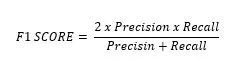
* Precision ve Recall değerlerinin harmonik ortalaması alınarak elde edilen metriktir.

## Regresyon Model Metrikleri



> R², verilerin yerleştirilmiş regresyon doğrusuna ne kadar yakın olduğunun istatistiksel bir ölçüsüdür. Ayrıca belirleme katsayısı veya çoklu regresyon için çoklu belirleme katsayısı olarak da bilinir. 
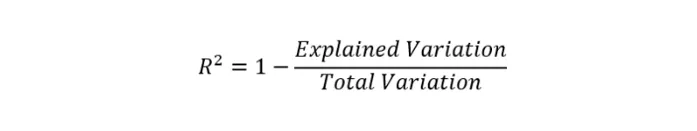



> Mean Squared Error(MSE)
Ortalama Kare Hatası (MSE) en sık kullanılan regresyon kaybı fonksiyonudur. MSE, tüm veri kümesinde örnek başına ortalama kare kaybıdır.
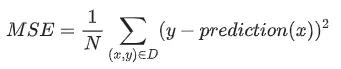
Düşük bir değer daha iyi doğruluğu gösterir.





### Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np 
import pandas as pd
# Görselleştirme Kütüphaneleri
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
#Train-test Split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#Standardizasyon
from sklearn.preprocessing import StandardScaler
#Classification Model Metrikleri
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
#Classification Modelleri
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
#Linear Regression Veri Ön İşleme 
from sklearn.preprocessing import LabelEncoder
#Linear Regression Model Metrikleri
from sklearn.metrics import r2_score,mean_squared_error
#Linear Regression Modelleri
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

### Classification Veri Seti: https://www.kaggle.com/datasets/heptapod/titanic?datasetId=1275&sortBy=voteCount&select=train_and_test2.csv

### Regression Veri Seti: https://www.kaggle.com/datasets/mirichoi0218/insurance?datasetId=13720&sortBy=voteCount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Classification Modelleme


* Veri Setini Tanıyalım
    * Age: Yolcu Yaşı
    * Fare: Yolcu Ücreti
    * Sex: Cinsiyet (0: Erkek, 1:Kadın)
    * sibsp: Kardeş/Eş 
    * Parch: Ebeveyn/çocuk
    * Pclass: Bilet Sınıfı
    * Embarked: Biniş Limanı
    * Survived: Yaşam Durumu (0: Hayır, 1: Evet - Tahmin edilmek istenen bağımlı değişken)

In [5]:
titanic = pd.read_csv("/content/drive/MyDrive/AISTUDIO/Python Eğitimi/titanic.csv")
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [7]:
titanic_df=titanic[['Age','Fare','Sex','sibsp','Parch','Pclass','Embarked','2urvived']]
titanic_df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


*  Veri Seti ile ilgili Temel Bilgiler

In [ ]:
print('Veri Seti Boyutu :',titanic_df.shape)
print('Veri Seti Boyutu :',titanic_df.size)

Veri Seti Boyutu : (1309, 8)
Veri Seti Boyutu : 10472


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   2urvived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [ ]:
titanic_df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
2urvived    0
dtype: int64

In [12]:
titanic_df=titanic_df.dropna()

In [ ]:
titanic_df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    0
2urvived    0
dtype: int64

In [ ]:
titanic_df.describe(include=['float64']).T

,count,mean,std,min,25%,50%,75%,max
Age,1307.0,29.471821,12.881592,0.17,22.0000,28.0000,35.000,80.0000
Fare,1307.0,33.209595,51.748768,0.00,7.8958,14.4542,31.275,512.3292
Embarked,1307.0,1.492731,0.814626,0.00,1.0000,2.0000,2.000,2.0000


In [ ]:
titanic_df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
Age,1.000,0.177,-0.057,-0.189,-0.125,-0.376,-0.065,-0.060
Fare,0.177,1.000,0.184,0.161,0.222,-0.558,-0.239,0.172
Sex,-0.057,0.184,1.000,0.111,0.214,-0.122,-0.099,0.402
sibsp,-0.189,0.161,0.111,1.000,0.373,0.060,0.066,-0.013
Parch,-0.125,0.222,0.214,0.373,1.000,0.017,0.045,0.056
Pclass,-0.376,-0.558,-0.122,0.060,0.017,1.000,0.187,-0.242
Embarked,-0.065,-0.239,-0.099,0.066,0.045,0.187,1.000,-0.093
2urvived,-0.060,0.172,0.402,-0.013,0.056,-0.242,-0.093,1.000


In [ ]:
def pivot2(x):
  return pd.crosstab(x, titanic_df['2urvived'],normalize='index').T

In [ ]:
#Toplam erkek nüfusunun %88'i kaza sonucu ölmüştür. Kadınlarda ise bu oran 0.50'dir.
pivot2(titanic_df['Sex'])

Sex,0,1
2urvived,,
0,0.8707,0.5
1,0.1293,0.5


* Veri Setinin Görselleştirilmesi

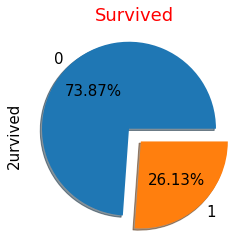

In [8]:
plt.rcParams.update({'font.size': 15})
titanic_df['2urvived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

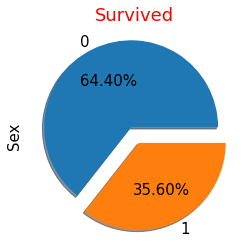

In [ ]:
plt.rcParams.update({'font.size': 15})
titanic_df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

<AxesSubplot:xlabel='Age', ylabel='Count'>

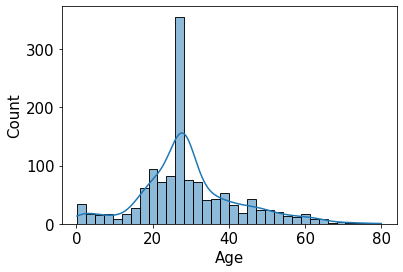

In [ ]:
sns.histplot(data=titanic_df, x="Age", kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

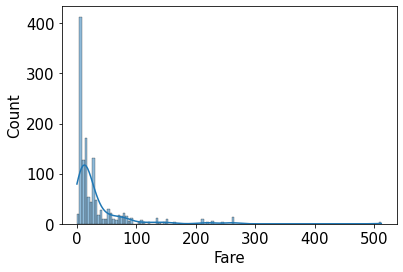

In [ ]:
sns.histplot(data=titanic_df, x="Fare", kde=True)

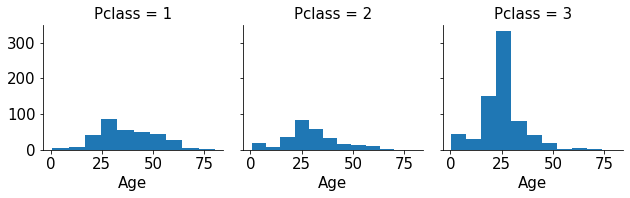

In [ ]:
g = sns.FacetGrid(titanic_df, col="Pclass")
g = g.map(plt.hist, "Age")

* Train-Test Split

In [13]:
X = titanic_df.drop(['2urvived'],axis=1) 
y = titanic_df['2urvived']

In [ ]:
X.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.2500,0,1,0,3,2.0
1,38.0,71.2833,1,1,0,1,0.0
2,26.0,7.9250,1,0,0,3,2.0
3,35.0,53.1000,1,1,0,1,2.0
4,35.0,8.0500,0,0,0,3,2.0


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (875, 7)
y_train (875,)
X_test (432, 7)
y_test (432,)


* Lojistik Regreston

In [15]:
loj=LogisticRegression()
loj_model=loj.fit(X_train,y_train)
y_pred= loj_model.predict(X_test)
print(classification_report(y_test,y_pred))
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

##Yorum yapalım

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       308
           1       0.72      0.37      0.49       124

    accuracy                           0.78       432
   macro avg       0.75      0.66      0.67       432
weighted avg       0.77      0.78      0.75       432



0.803276955602537

In [ ]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import scikitplot as skplt

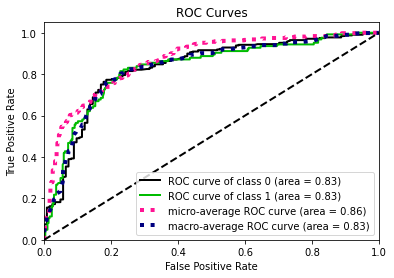

In [ ]:
skplt.metrics.plot_roc(y_test, loj_model.predict_proba(X_test))
plt.show()

*  Random Forest

In [16]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred= rf_model.predict(X_test)
print(classification_report(y_test,y_pred))
cross_val_score(rf_model,X_test,y_test,cv=10).mean()

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       308
           1       0.55      0.40      0.47       124

    accuracy                           0.73       432
   macro avg       0.67      0.64      0.64       432
weighted avg       0.72      0.73      0.72       432



0.7731501057082453

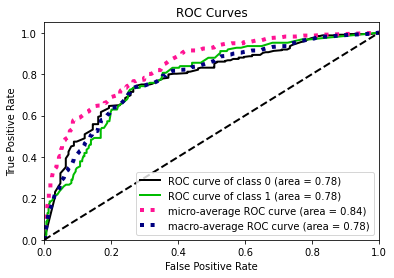

In [ ]:
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test))
plt.show()

In [ ]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)


Text(0.5, 0, 'Değişken Önem Düzeyleri')

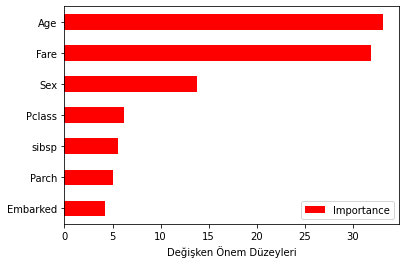

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## Lineer Regresyon

* Veri Setini Tanıyalım
    * Age: Yaş
    * Sex: Cinsiyet
    * BMI: Vücut Kitle İndeksi
    * Children: Sağlık sigortası kapsamında çocuk sayısı ya da bakmakla yükümlü olduğu kişi sayısı
    * Smoker: Sigara içme durumu (Evet/Hayır)
    * Region: ABD yerleşim bölgesi
    * Charges: Masraflar (Tahmin edilmek istenen bağımlı değişken)

In [17]:
insurance = pd.read_csv("/content/drive/MyDrive/AISTUDIO/Python Eğitimi/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Veri Seti ile İlgili Temel Bilgiler

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
insurance.describe(include=['object']).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [ ]:
insurance.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000


* Veri Ön İşleme Adımları 

In [18]:
insurance_df=insurance.copy()

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
from sklearn.preprocessing import LabelEncoder
#cinsiyet(0:Kadın, 1:Erkek)
le = LabelEncoder()
le.fit(insurance.sex.drop_duplicates()) 
insurance_df.sex = le.transform(insurance.sex)
# sigara içme durumu (1:Evet, 0:Hayır)
le.fit(insurance.smoker.drop_duplicates()) 
insurance_df.smoker = le.transform(insurance.smoker)
#bölge
le.fit(insurance.region.drop_duplicates()) 
insurance_df.region = le.transform(insurance.region)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


* Veri Setini Görselleştirelim

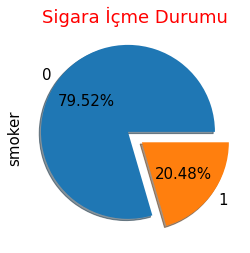

In [ ]:
plt.rcParams.update({'font.size': 15})
insurance_df['smoker'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Sigara İçme Durumu',color='Red',loc='center');

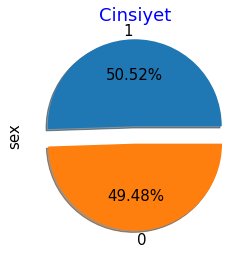

In [ ]:
plt.rcParams.update({'font.size': 15})
insurance_df['sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Cinsiyet',color='Blue',loc='center');

Text(0.5, 1.0, 'Sigara içmeyenler için masraf dağılımı')

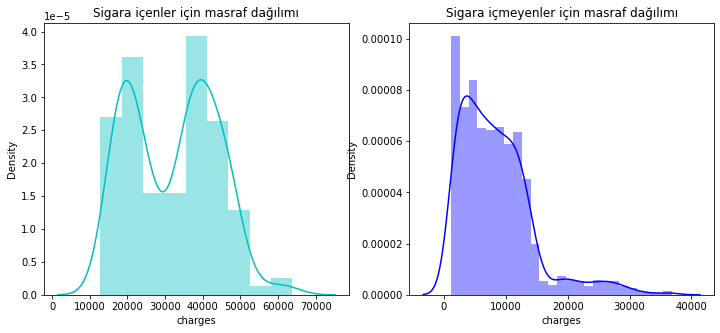

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insurance_df[(insurance_df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Sigara içenler için masraf dağılımı')

ax=f.add_subplot(122)
sns.distplot(insurance_df[(insurance_df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Sigara içmeyenler için masraf dağılımı')

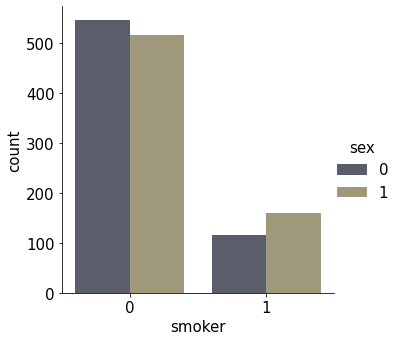

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="cividis", data=insurance_df)

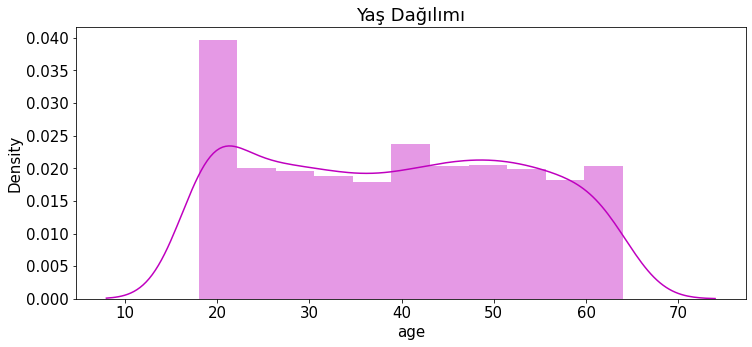

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Yaş Dağılımı")
ax = sns.distplot(insurance_df["age"], color = 'm')

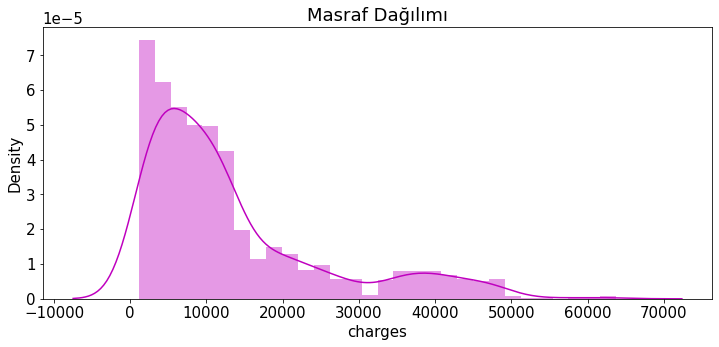

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Masraf Dağılımı")
ax = sns.distplot(insurance_df["charges"], color = 'm')

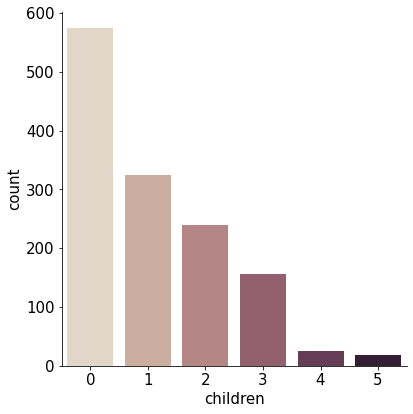

In [ ]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=insurance_df, size = 6)

* Train- Test Split

In [20]:
X = insurance_df.drop(['charges'],axis=1) 
y = insurance_df['charges']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (896, 6)
y_train (896,)
X_test (442, 6)
y_test (442,)


* Lineer Regresyon

In [22]:
lr = LinearRegression().fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
print('R^2 Değeri:', lr.score(X_test,y_test))

R^2 Değeri: 0.7602640802497018


In [ ]:
lr.coef_

array([  262.00518915,   129.10270377,   342.2658478 ,   373.20803797,
       23693.32775546,  -294.4964067 ])

*  Random Forest Regresyon

In [23]:
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)
print('R^2 Değeri:', rf_regressor.score(X_test,y_test))

R^2 Değeri: 0.8261522967153474


In [ ]:
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [24]:
rf_regressor. feature_importances_

array([0.15193202, 0.00623277, 0.20930917, 0.0204246 , 0.59457779,
       0.01752364])